In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import data

X, Y = data.get_data()

/system/linux/anaconda3.7/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# look at data

/system/linux/anaconda3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


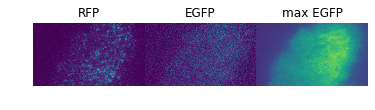

In [2]:
R, C = 1, 3
plt.figure(figsize=(C*2, R*2))

plt.subplot(R, C, 1)
plt.title('RFP')
plt.imshow(X[0])

plt.subplot(R, C, 2)
plt.title('EGFP')
plt.imshow(Y[0])

plt.subplot(R, C, 3)
plt.title('max EGFP')
plt.imshow(Y.sum(axis=0))
plt.subplots_adjust(hspace=0.1, wspace=0)

for i in range(1, 4):
    plt.subplot(R, C, i)
    plt.axis('off')

# linear model

In [3]:
X_patches_flat, Y_centers = data.extract_patch_features(X, Y)

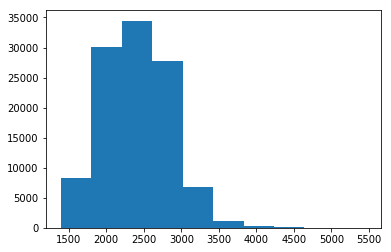

In [5]:
plt.hist(Y_centers)
plt.show()

In [ ]:
m = LinearRegression()
m.fit(X_patches_flat, Y_centers)